<a href="https://colab.research.google.com/github/nivedha75/Columbia-Summer-Coursework/blob/master/Copy_of_RegressionModel_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load our data

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/iris.csv')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Some Quick EDA

```
import seaborn as sn
sn.heatmap(df.corr(), annot=True)
```

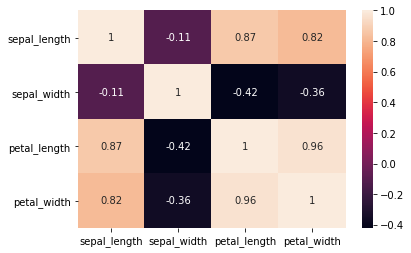

In [ ]:
import seaborn as sn
sn.heatmap(df.corr(), annot=True)

```
df.plot(kind='scatter',y='PetalWidthCm',x='PetalLengthCm')
```

KeyError: ignored

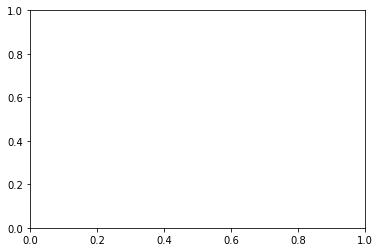

In [ ]:
#df.plot(kind='scatter',y='petal_width',x='petal_length')
df.plot(kind='scatter',y='petal_length',x='sepal_width')

## 3. Standardize the data

```
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df[['SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm']])


df_scaled = pd.DataFrame(data=scaled, columns=['SepalLengthCm_scaled',
 'SepalWidthCm_scaled',
 'PetalLengthCm_scaled',
 'PetalWidthCm_scaled'])

df = df.join(df_scaled)

```

In [ ]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaled = scaler.fit_transform(df[['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width']])
 
 
df_scaled = pd.DataFrame(data=scaled, columns=['SepalLengthCm_scaled',
 'SepalWidthCm_scaled',
 'PetalLengthCm_scaled',
 'PetalWidthCm_scaled'])
 
df = df.join(df_scaled)
 

ValueError: ignored

## 4. Run the model


```
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

X = df[['PetalLengthCm_scaled']]
y = df['PetalWidthCm']

LR.fit(X, y)

df['prediction'] = LR.predict(X)
df.head(20)
```

In [ ]:
from sklearn.linear_model import LinearRegression
 
LR=LinearRegression()
 
X = df[['PetalLengthCm_scaled']]
y = df['PetalWidthCm']
 
LR.fit(X, y)
 
df['prediction'] = LR.predict(X)
df.head(20)

## 5. Check the performance

```
from sklearn.metrics import mean_squared_error
import numpy as np

mean_squared_error(df['PetalWidthCm'],df['prediction'])

np.sqrt(mean_squared_error(df['PetalWidthCm'],df['prediction']))
```

## 6. See the weights and biases


```
LR.coef_
```

```
LR.intercept_
```

A one standard deviation increase in Petal length results in a .732*STD(PetalWidth)increase in Petal Width. If an x value equals zero then the value of y would be 1.199. 

If we did not standardize the data, we would interpret this as a 1 cm increase in Petal Length results in a 1 cm increase in Petal Width. 

## 7. Repeat


```
LR=LinearRegression()
X = df[['PetalLengthCm_scaled','SepalLengthCm_scaled','SepalWidthCm_scaled']]
y = df['PetalWidthCm']

LR.fit(X, y)

df['prediction'] = LR.predict(X)
mean_squared_error(df['PetalWidthCm'],df['prediction'])
```

Calculate and interpret the weights and biases.

Create binary features from the Species categorical feature. Add these features as inputs into our model and check the performance.

What happens when you keep adding new features to the model?



**Warning:** So far, we are calculating our performance on the same data that we fit our model on. This means that the model is predicting observations it has already seen before, meaning it's perfectly modeling the sample but not necessarily the underlying population.

For example, if you were predicting the heights of students and it just happens to be that the day you are collecting your sample, everyone who is tall wore a red shirt, your model would improve if you add a binary red shirt feature. BUT that does not mean that red shirt is an important or informative feature. It only appears that way because of the sample of data. 

We want to AVOID having the nuances of our data sample influence our predictions. We will explore how to deal with this issue later when we explore cross-validation. For now, just take these prediction scores with a grain of salt.

### Challenge

- Create a 3 feature linear regression model to predict median home values in the Boston Housing Dataset.
- Report the performance of the model.
- Interpret the weights and biases in the model.